# HW 8


## Problem1 .Using the trained model for MNIST data during the class, answer the following question. 

### import

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

### Data Load

In [2]:
mnist = sklearn.datasets.fetch_openml('mnist_784', data_home="mnist_784")

In [3]:
# Train data 나눠주기
x_train = torch.tensor(np.array(mnist.data[:60000]), dtype=torch.float) / 255
y_train = torch.tensor([int(x) for x in mnist.target[:60000]])

In [4]:
# Test data 나눠주기
x_test = torch.tensor(np.array(mnist.data[60000:]), dtype=torch.float) / 255
y_test = torch.tensor([int(x) for x in mnist.target[60000:]])

In [5]:
# train data shape 출력
# train data의 개수는 60000이고 28x28의 사이즈로 784의 길이를 가지는 것을 확인할 수 있음
print(x_train.shape, y_train.shape)

torch.Size([60000, 784]) torch.Size([60000])


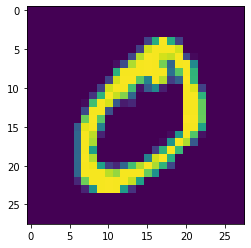

In [6]:
# image하나 출력해보기
plt.imshow(x_train[1].reshape(28,28))

### Data Proprocessing

In [7]:
class Data(Dataset):
  def __init__(self):
    self.x = torch.tensor(x_train, dtype=torch.float32)
    self.y = torch.tensor(y_train, dtype=torch.int64)
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  def __len__(self):
    return self.x.shape[0]

In [8]:
mydata = Data()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


In [9]:
class Data(Dataset):
  def __init__(self):
    self.x = torch.tensor(x_train, dtype=torch.float32)
    num_classes=10
    one_hot_target = (mydata.y.reshape(-1,1) == torch.arange(num_classes).reshape(1, num_classes)).float()
    self.y = one_hot_target
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  def __len__(self):
    return self.x.shape[0]

In [10]:
mydata=Data()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


### Modeling

In [11]:
model2 = nn.Sequential(
    nn.Linear(784,10),
    nn.Softmax()
) #output: [P_i0, ... ,P_i9]
mydata.y.shape

torch.Size([60000, 10])

In [12]:
num_classes=10
one_hot_target = (mydata.y.reshape(-1,1) == torch.arange(num_classes).reshape(1, num_classes)).float()

In [13]:
mydata.y.shape

torch.Size([60000, 10])

In [14]:
one_hot_target.shape

torch.Size([600000, 10])

In [15]:
# Loss function 구성
def loss2(phat=model2(mydata.x), true_y_onehot=one_hot_target):
  return -torch.mean(true_y_onehot*torch.log(phat))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [16]:
dataloader= DataLoader(dataset = mydata, batch_size=32, shuffle=True)
optimizer = torch.optim.SGD(model2.parameters(), lr=0.01)

### Training

In [17]:
history=[]
epochs=20
for epoch in range(epochs):
  Phat = model2(mydata.x)
  LOSS = loss2(Phat, mydata.y)
  history.append(LOSS)
  for x,y in dataloader:
    phat = model2(x)
    loss = loss2(phat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(loss))
print('Learning finished')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch: 0001 cost = 0.133645728
Epoch: 0002 cost = 0.089715138
Epoch: 0003 cost = 0.096236750
Epoch: 0004 cost = 0.072049722
Epoch: 0005 cost = 0.065380253
Epoch: 0006 cost = 0.069609977
Epoch: 0007 cost = 0.059699357
Epoch: 0008 cost = 0.063894115
Epoch: 0009 cost = 0.042589016
Epoch: 0010 cost = 0.034908995
Epoch: 0011 cost = 0.057321765
Epoch: 0012 cost = 0.045998361
Epoch: 0013 cost = 0.055355567
Epoch: 0014 cost = 0.042951249
Epoch: 0015 cost = 0.066048339
Epoch: 0016 cost = 0.037927099
Epoch: 0017 cost = 0.045697626
Epoch: 0018 cost = 0.045834959
Epoch: 0019 cost = 0.060770977
Epoch: 0020 cost = 0.056791317
Learning finished


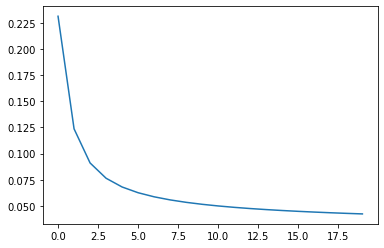

In [18]:
plt.plot(history)

### Test

In [19]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다
    prediction = model2(x_test)
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.8967999815940857


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


=> Test data에 대해 약 89% 정도의 정확도를 보임

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Label:  9
Prediction:  9


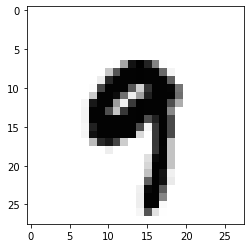

In [20]:
# MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측
import random
r = random.randint(0, len(x_test) - 1)
X_single_data = x_test[r:r + 1].view(-1, 28 * 28).float()
Y_single_data = y_test[r:r + 1]

print('Label: ', Y_single_data.item())
single_prediction = model2(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(x_test[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

### 내 손글씨를 이용해 예측해보기

a> Make the 11 image files where each image represent each digit of your phone
number. Read the image file to Python and name it as X. The shape of X should
be [11, 28, 28]. Make sure that each image is gray scale where each pixel is a real
number between 0 and 1.

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
cd /content/drive/MyDrive/mnist

/content/drive/MyDrive/mnist


### CV2를 이용해 내가 쓴 손글씨 Load해오기

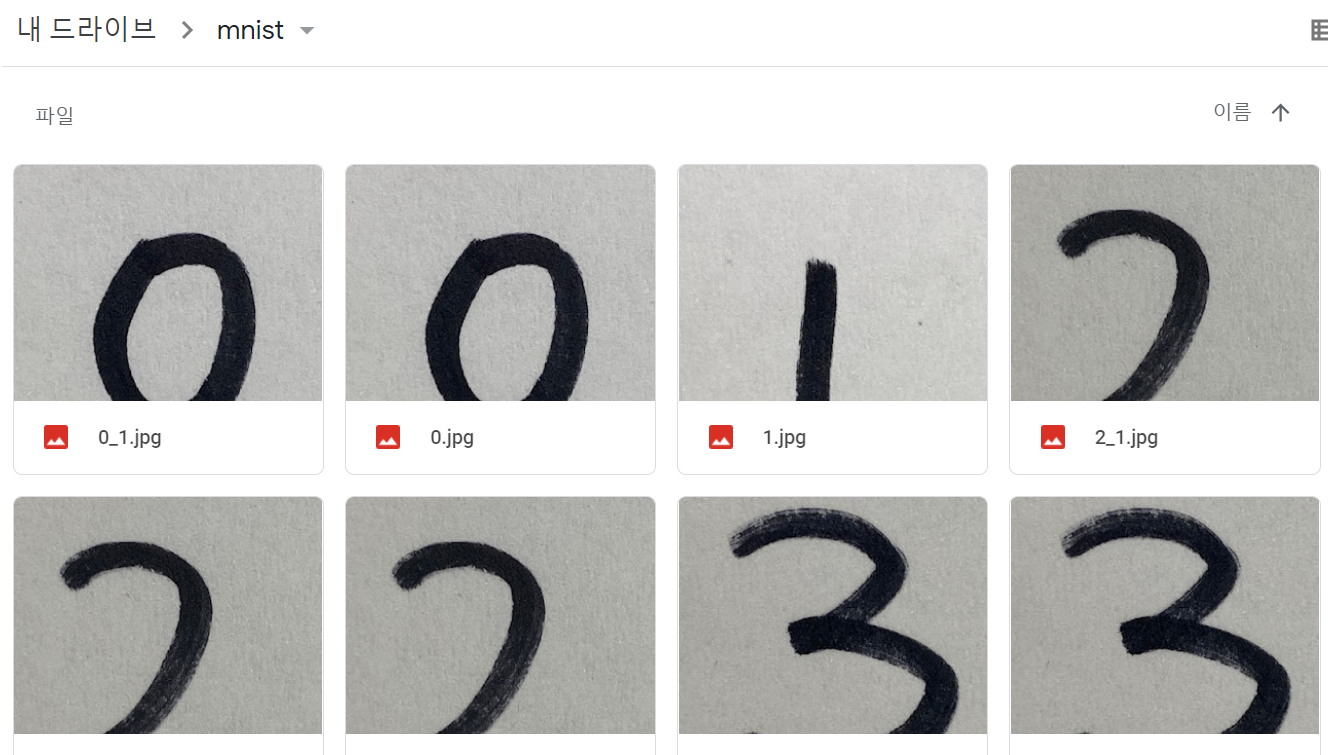

In [23]:
import numpy as np
import cv2


X=[]
# 번호 : 010-2637-2263
phone = ['0','1','0_1','2','6','3','7','2_1','2_2','6_1','3_1']

# 내 번호 순서대로 image 불러오기!
for i in phone:
  img=cv2.imread("/content/drive/MyDrive/mnist/"+i+".jpg",cv2.IMREAD_GRAYSCALE) # grayscale로 불러오기
  img = cv2.resize(img, dsize=(28,28), interpolation=cv2.INTER_LINEAR) # image size 조절해주기(28,28)
  im2arr = ((np.array(img) / 255) - 1) * -1 # 픽셀 값을 0과 1사이로
  X.append(im2arr) # list에 각 이미지의 array를 append 해서 X에 저장

X=torch.tensor(X).reshape(11,28,28) # pytorch를 이용하기 때문에 X를 tensor로 변환, reshape해줌
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  app.launch_new_instance()


tensor([[[0.2745, 0.2549, 0.2588,  ..., 0.2235, 0.2549, 0.2118],
         [0.2588, 0.2549, 0.2784,  ..., 0.2118, 0.2549, 0.2745],
         [0.2431, 0.2314, 0.2627,  ..., 0.2039, 0.2941, 0.2196],
         ...,
         [0.2824, 0.2784, 0.2784,  ..., 0.2902, 0.2706, 0.2902],
         [0.2902, 0.3137, 0.3176,  ..., 0.3059, 0.2745, 0.2824],
         [0.2784, 0.2706, 0.2745,  ..., 0.2706, 0.2431, 0.2745]],

        [[0.1882, 0.1961, 0.1882,  ..., 0.1961, 0.1765, 0.1804],
         [0.2039, 0.2039, 0.1922,  ..., 0.1922, 0.1843, 0.1725],
         [0.2118, 0.2039, 0.1922,  ..., 0.1647, 0.1765, 0.1843],
         ...,
         [0.2745, 0.2392, 0.2510,  ..., 0.2392, 0.2039, 0.2078],
         [0.2275, 0.2431, 0.2667,  ..., 0.2353, 0.2471, 0.2157],
         [0.2431, 0.2275, 0.2588,  ..., 0.2588, 0.2824, 0.2627]],

        [[0.2745, 0.2549, 0.2588,  ..., 0.2235, 0.2549, 0.2118],
         [0.2588, 0.2549, 0.2784,  ..., 0.2118, 0.2549, 0.2745],
         [0.2431, 0.2314, 0.2627,  ..., 0.2039, 0.2941, 0.

In [24]:
X.shape

torch.Size([11, 28, 28])

=> X의 shape가 [11, 28, 28]로 잘 출력된 것을 확인할 수 있음

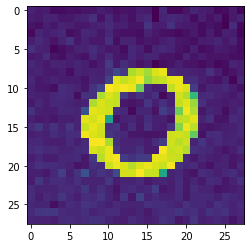

In [25]:
plt.imshow(X[2].reshape(28,28))

=> 내가 쓴 손글씨가 잘 출력되는 것을 확인할 수 있다

b> Create Y variable for the label of each image. For example, my phone number
is 010-1234-1234. then Y=[0,1,0,1,2,3,4,1,2,3,4]. Transform Y so that its shape is [11,1].


In [26]:
Y=np.array([0,1,0,2,6,3,7,2,2,6,3]).reshape(11,1)
Y=torch.tensor(Y)
Y

tensor([[0],
        [1],
        [0],
        [2],
        [6],
        [3],
        [7],
        [2],
        [2],
        [6],
        [3]])

In [27]:
Y.shape

torch.Size([11, 1])

=> [11,1]의 크기로 전화번호 각 숫자에 맞는 tensor Y가 잘 출력된 것을 확인할 수 있다

### 내가 쓴 손글씨 Test

c> Using the traind model for MNIST data to check whether the trained model
classify X correctly or not. If not, properly adjust your model or data so that the model correctly classify the images. 


In [28]:
# 모델에 넣어주기 위해서 reshape해주기
X=torch.tensor(X, dtype=torch.float32).reshape(11,784)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [29]:
# 전화번호 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다
    prediction = model2(X)
    correct_prediction = torch.argmax(prediction, 1).reshape(11,1) == Y
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.8181818127632141


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


=> 약 80%의 정확도가 나오는 것을 확인할 수 있다!

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Label:  2
Prediction:  2


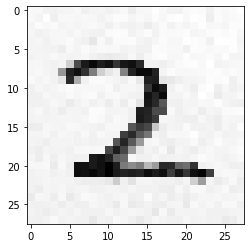

In [30]:
# 전화번호 데이터에서 무작위로 하나를 뽑아서 예측
import random
r = random.randint(0, len(X) - 1)
X_single_data = X[r:r + 1].view(-1, 28 * 28).float()
Y_single_data = Y[r:r + 1]

print('Label: ', Y_single_data.item())
single_prediction = model2(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(X[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

=> 내가 쓴 손글씨 0을 label 0으로 잘 예측하고 있다

## Problem 2. (Boston house data set) You are given the following data.

### Data Load

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import torch.nn as nn

In [32]:
from sklearn.datasets import load_boston
X, Y = load_boston(return_X_y=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Train data와 Test data split해주기

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2)

a> Provide the point estimator using LinearRegression function in
sklearn.linear_model package. 

In [34]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression(normalize=True)
line_fitter.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [35]:
print("학습 데이터 점수: {}".format(line_fitter.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(line_fitter.score(X_test,y_test)))

학습 데이터 점수: 0.7340740491247655
평가 데이터 점수: 0.7509897747744674


point estimator

In [36]:
#생성된 회귀모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현
print('y = ' + str(line_fitter.intercept_) + ' ')
for i, c in enumerate(line_fitter.coef_):
  print(str(c) + ' * x' + str(i))

y = 36.881982288860186 
-0.09050154337913374 * x0
0.04752149022199924 * x1
0.054752471739241235 * x2
1.561937886229416 * x3
-16.696565570033336 * x4
3.8855425038442704 * x5
0.0017888401271430668 * x6
-1.467554006974361 * x7
0.3203623225566693 * x8
-0.013578629603004789 * x9
-1.0298663182971883 * x10
0.009997060425707525 * x11
-0.5592627175670414 * x12


성능 평가하기 (MSE, MAE)

In [37]:
from sklearn.metrics import mean_squared_error
prediction = line_fitter.predict(X=X_test)
print('Mean Squared Error: ', mean_squared_error(prediction, y_test))

Mean Squared Error:  22.551717075548986


In [38]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error: ', mean_absolute_error(prediction, y_test))

Mean Absolute Error:  3.442605690883887


b> Provide the point estimator using Autograd in Pytorch like in Section 2 of Pytorch_2_linear_regression.ipynb file

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [40]:
def forward(x):
  return x.matmul(w)+b

def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
  
w = torch.tensor([[10.],[10.],[10.],[10.],[10.],[10.],[10.],[10.],[10.],[10.],[10.],[10.],[10.]],requires_grad=True)
b = torch.tensor([10.0], requires_grad=True)

In [41]:
X_train=torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [42]:
history = []
lr = 0.1
for epoch in range(30):
  Yhat = forward(X_train)
  loss = criterion(Yhat, y_train) #MSE
  history.append(loss)
  loss.backward()
  w.data = w.data - lr * w.grad.data
  b.data = b.data - lr * b.grad.data
  w.grad.data.zero_()
  b.grad.data.zero_()

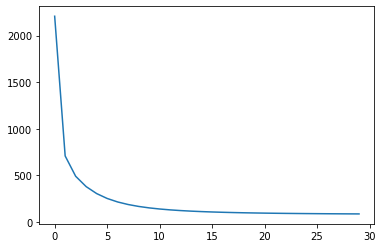

In [43]:
plt.plot(history)

point estimator

In [44]:
# 속성 값을 통해 수식을 표현
print('y = ' + str(float(b)) + ' ')
for i, c in enumerate(w):
  print(str(float(c)) + ' * x' + str(i))

y = 22.816539764404297 
0.8135621547698975 * x0
-0.2637224495410919 * x1
1.2788901329040527 * x2
-0.06396736949682236 * x3
2.101252794265747 * x4
1.6063504219055176 * x5
0.6069319844245911 * x6
3.2770419120788574 * x7
-0.7089464068412781 * x8
-1.1065174341201782 * x9
0.867923378944397 * x10
0.5761373043060303 * x11
0.8219530582427979 * x12


성능 평가하기(MSE, MAE)

In [45]:
predict = X_test.matmul(w)+b
print('Mean Squared Error: ', mean_squared_error(prediction, y_test))
print('Mean Absolute Error: ', mean_absolute_error(prediction, y_test))

Mean Squared Error:  22.55171811861984
Mean Absolute Error:  3.442605849829606


c> Provide the point estimator using stochastic gradient descent
using Dataset and DataLoader (batchsize=32) like in Section 3 of Pytorch_2_linear_regression.ipynb file.

In [46]:
# Import libraries
from torch.utils.data import Dataset, DataLoader

In [47]:
class Data(Dataset):
  def __init__(self, xx, yy):
    self.x = xx
    self.y = yy
    self.len = xx.shape[0]
  
  def __getitem__(self, index):
    return self.x[index] , self.y[index]
  def __len__(self):
    return self.len  

In [48]:
mydata = Data(X_train, y_train)

In [49]:
trainloader= DataLoader(dataset = mydata, batch_size=32, shuffle=True) 
# mydata : XX, YY가 Dataset 형태로 바뀐것

In [50]:
from torch import nn, optim

def criterion(yhat, y):
  return torch.mean((yhat-y)**2)

w = torch.tensor([[10.],[10.],[10.],[10.],[10.],[10.],[10.],[10.],[10.],[10.],[10.],[10.],[10.]],requires_grad=True)
b = torch.tensor([10.0], requires_grad=True)
# SGD를 이용해 optimizer 정의
optimizer = optim.SGD([w,b], lr=0.01)

In [51]:
# Yhat= b + w*X
def forward(x):
  return x.matmul(w)+b

In [52]:
epochs = 50
history = []
for epoch in range(epochs):
  Yhat = forward(mydata.x) #Yhat = w*X+b
  LOSS = criterion(Yhat, mydata.y) ###########
  history.append(LOSS)
  for x,y in trainloader:
    yhat = forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

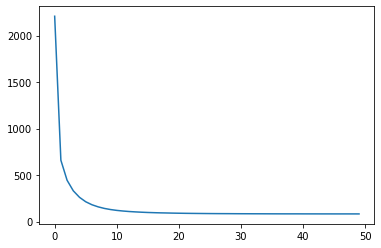

In [53]:
plt.plot(history)

point estimator

In [54]:
# 속성 값을 통해 수식을 표현
print('y = ' + str(float(b)) + ' ')
for i, c in enumerate(w):
  print(str(float(c)) + ' * x' + str(i))

y = 22.771469116210938 
0.20480118691921234 * x0
-0.13496758043766022 * x1
0.2552280128002167 * x2
-0.029768209904432297 * x3
0.6724958419799805 * x4
0.36091381311416626 * x5
-0.014869906939566135 * x6
0.864740788936615 * x7
0.01978634111583233 * x8
-0.434532105922699 * x9
0.11719561368227005 * x10
0.1283436119556427 * x11
-0.05650923028588295 * x12


성능 평가하기(MES, MAE)

In [55]:
predict3 = X_test.matmul(w)+b
print('Mean Squared Error: ',  mean_squared_error(prediction, y_test))
print('Mean Absolute Error: ', mean_absolute_error(prediction, y_test))

Mean Squared Error:  22.55171811861984
Mean Absolute Error:  3.442605849829606


d> Provide the point estimator using stochastic gradient descent using Pytorch functions like in Section 4 of Pytorch_2_linear_regression.ipynb file.

In [56]:
class linear_regression(nn.Module):
  def __init__(self, input_size, output_size):
    super(linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size) #W, b가 정의된것 처럼 보임
  def forward(self,x):
    yhat = self.linear(x) # W @ x+b
    return yhat

In [57]:
from torch import nn, optim

model = linear_regression(13,1)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [58]:
epochs = 30
history = []
for epoch in range(epochs):
  Yhat = model(X_train) #Yhat = w*X+b
  LOSS = criterion(Yhat, y_train) ###########
  history.append(LOSS)
  for x,y in trainloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

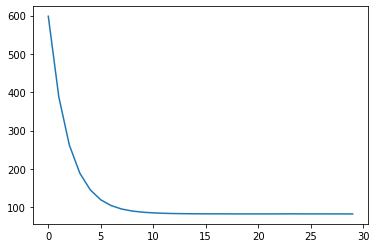

In [59]:
plt.plot(history)

point estimator

In [60]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0183,  0.0586,  0.0445,  0.0555, -0.0272,  0.0535,  0.0008, -0.1089,
                       -0.0277,  0.0222, -0.0862,  0.0036, -0.1293]])),
             ('linear.bias', tensor([22.7992]))])

In [61]:
predict4 = model(X_test)
print('Mean Squared Error: ', float(torch.mean((predict4-y_test)**2)))
print('Mean Absolute Error: ', float(torch.mean(torch.abs(predict4-y_test))))

Mean Squared Error:  92.6476821899414
Mean Absolute Error:  7.3263773918151855


## Problem 3. (breast_cancer dataset) You are given the following data.

Data load

In [62]:
from sklearn import datasets
breast_cancer=datasets.load_breast_cancer()
X=torch.tensor(breast_cancer.data).float()
Y=torch.tensor(breast_cancer.target).reshape(-1,1)
print(X.shape, Y.shape)

torch.Size([569, 30]) torch.Size([569, 1])


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2)

a_1> Write the loss function in the logistic regression in hand. Hint: solution

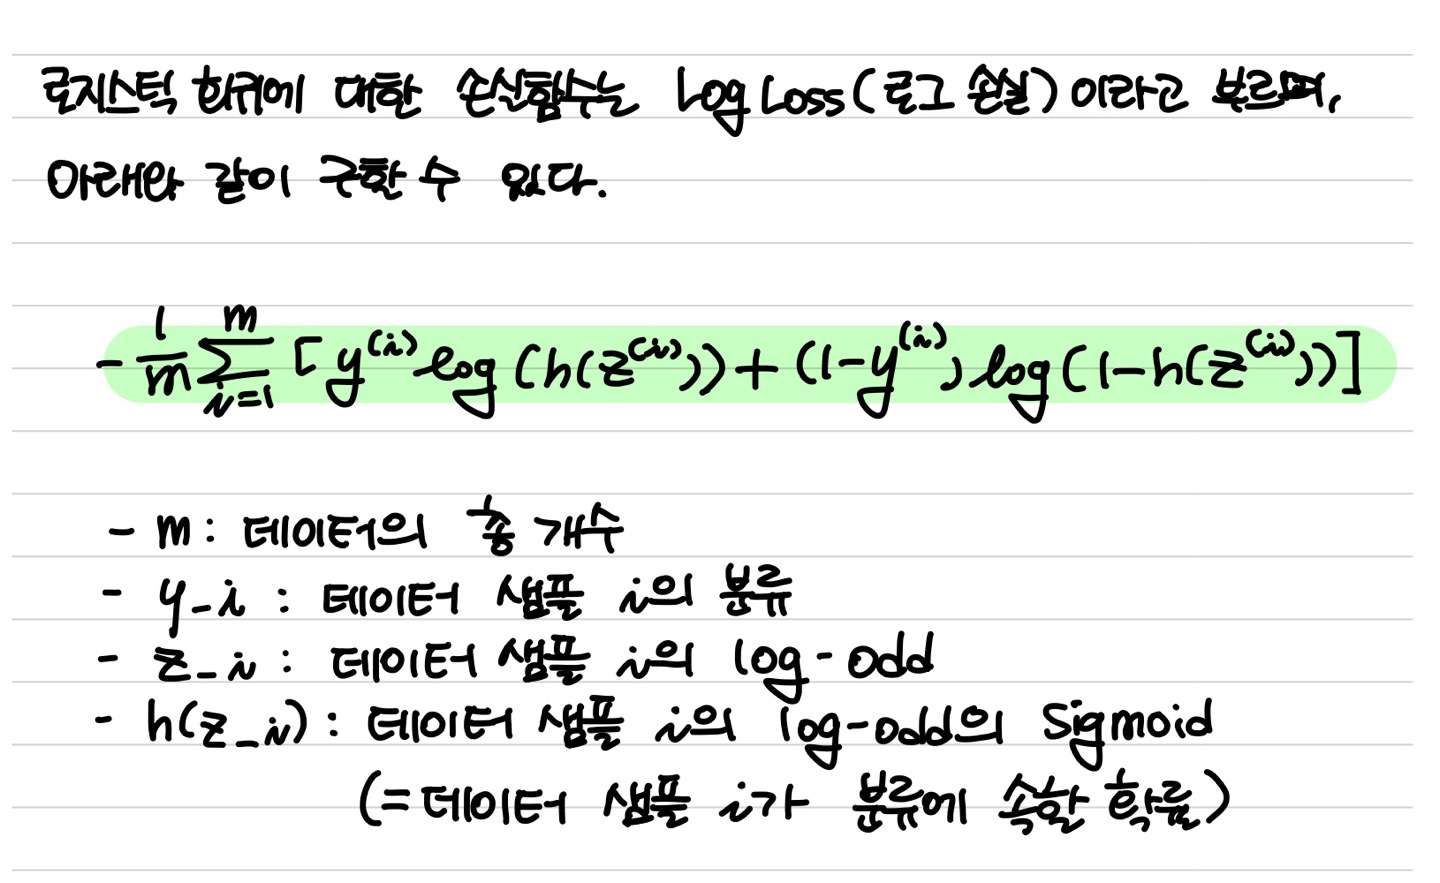

a_2> Provide the point estimator using LogisticRegression function in sklearn.linear_model package.

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [65]:
from sklearn.linear_model import LogisticRegression
logistic_fitter = LogisticRegression()
logistic_fitter.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Accuracy

In [66]:
print("학습 데이터 점수: {}".format(logistic_fitter.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(logistic_fitter.score(X_test,y_test)))

학습 데이터 점수: 0.9912087912087912
평가 데이터 점수: 0.9912280701754386


point estimator

In [67]:
#생성된 회귀모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현
print(logistic_fitter.intercept_)
print(logistic_fitter.coef_)

[0.15531118]
[[-0.32323495 -0.30752332 -0.32567491 -0.40021198 -0.16450338  0.5084673
  -0.90862951 -0.88723103  0.07777858  0.23771891 -1.28826828 -0.06454842
  -0.54086749 -1.06809253 -0.17961992  0.59344041  0.14964976 -0.27172926
   0.28706639  0.66692347 -0.93528247 -1.10566786 -0.74203055 -0.94991767
  -0.66274595  0.09708405 -0.76739408 -1.02067119 -0.61978026 -0.52935682]]


b> Provide the point estimator using Autograd in Pytorch similar to Section 2 of Pytorch_2_linear_regression.ipynb file.

In [68]:
def forward(x):
  h = torch.sigmoid(x.matmul(w)+b)
  return h


def criterion(yhat0, y0):
  out = -1 * torch.mean(y0 * torch.log(yhat0) + (1 - y0) * torch.log(1 - yhat0))
  return out
  
w = torch.zeros((30,1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [69]:
X_train=torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [70]:
history = []
lr = 0.1
for epoch in range(30):
  Yhat = forward(X_train)
  loss = criterion(Yhat, y_train)
  history.append(loss)
  print(loss)
  loss.backward()
  w.data = w.data - lr * w.grad.data
  b.data = b.data - lr * b.grad.data
  w.grad.data.zero_()
  b.grad.data.zero_()

tensor(0.6931, grad_fn=<MulBackward0>)
tensor(0.5233, grad_fn=<MulBackward0>)
tensor(0.4358, grad_fn=<MulBackward0>)
tensor(0.3821, grad_fn=<MulBackward0>)
tensor(0.3451, grad_fn=<MulBackward0>)
tensor(0.3177, grad_fn=<MulBackward0>)
tensor(0.2963, grad_fn=<MulBackward0>)
tensor(0.2791, grad_fn=<MulBackward0>)
tensor(0.2648, grad_fn=<MulBackward0>)
tensor(0.2527, grad_fn=<MulBackward0>)
tensor(0.2423, grad_fn=<MulBackward0>)
tensor(0.2332, grad_fn=<MulBackward0>)
tensor(0.2252, grad_fn=<MulBackward0>)
tensor(0.2180, grad_fn=<MulBackward0>)
tensor(0.2116, grad_fn=<MulBackward0>)
tensor(0.2058, grad_fn=<MulBackward0>)
tensor(0.2005, grad_fn=<MulBackward0>)
tensor(0.1957, grad_fn=<MulBackward0>)
tensor(0.1912, grad_fn=<MulBackward0>)
tensor(0.1871, grad_fn=<MulBackward0>)
tensor(0.1833, grad_fn=<MulBackward0>)
tensor(0.1798, grad_fn=<MulBackward0>)
tensor(0.1765, grad_fn=<MulBackward0>)
tensor(0.1734, grad_fn=<MulBackward0>)
tensor(0.1705, grad_fn=<MulBackward0>)
tensor(0.1678, grad_fn=<M

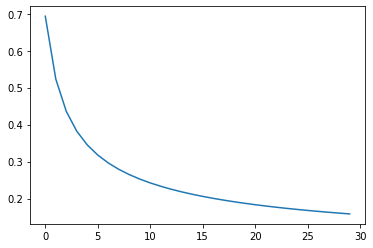

In [71]:
plt.plot(history)

Accuracy

In [72]:
from sklearn.metrics import accuracy_score
predic6 = torch.round(torch.sigmoid(X_test.matmul(w)+b))
predic6 = [int (i) for i in predic6]
print("accuracy_score: {}".format(accuracy_score(predic6, y_test)))

accuracy_score: 0.9649122807017544


point estimator

In [73]:
# 속성 값을 통해 수식을 표현
print('y = sigma(' + str(float(b)) + ' ')
for i, c in enumerate(w):
  print(str(float(c)) + ' * x' + str(i)+')')

y = sigma(0.19554975628852844 
-0.2617569863796234 * x0)
-0.18075518310070038 * x1)
-0.2615000009536743 * x2)
-0.25238335132598877 * x3)
-0.11579664796590805 * x4)
-0.14396508038043976 * x5)
-0.2033078372478485 * x6)
-0.261155903339386 * x7)
-0.08648007363080978 * x8)
0.08084451407194138 * x9)
-0.2020406574010849 * x10)
-0.000803199945949018 * x11)
-0.18549728393554688 * x12)
-0.18942293524742126 * x13)
0.017956778407096863 * x14)
0.007962008938193321 * x15)
0.026059186086058617 * x16)
-0.06462452560663223 * x17)
0.03922514244914055 * x18)
0.08685425668954849 * x19)
-0.29111549258232117 * x20)
-0.21618616580963135 * x21)
-0.2863873243331909 * x22)
-0.27109280228614807 * x23)
-0.18359333276748657 * x24)
-0.1700904369354248 * x25)
-0.1963246613740921 * x26)
-0.27390703558921814 * x27)
-0.1571613997220993 * x28)
-0.07552724331617355 * x29)


c> Provide the point estimator using stochastic gradient descent using Dataset and DataLoader (batchsize=32) similar to Section 3 of Pytorch_2_linear_regression.ipynb file.

In [74]:
# Import libraries
from torch.utils.data import Dataset, DataLoader

In [75]:
class Data(Dataset):
  def __init__(self, xx, yy):
    self.x = xx
    self.y = yy
    self.len = xx.shape[0]
  
  def __getitem__(self, index):
    return self.x[index] , self.y[index]
  def __len__(self):
    return self.len    

In [76]:
mydata = Data(X_train, y_train)

In [77]:
trainloader= DataLoader(dataset = mydata, batch_size=32, shuffle=True) 
# mydata : XX, YY가 Dataset 형태로 바뀐것

In [78]:
def criterion(yhat0,y0):
    out = -1 * torch.mean(y0 * torch.log(yhat0) + (1 - y0) * torch.log(1 - yhat0))
    return out

w = torch.zeros((30,1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# SGD를 이용해 optimizer 정의
optimizer = optim.SGD([w,b], lr=0.01)

In [79]:
# Yhat= b + w*X
def forward(x):
  h = torch.sigmoid(x.matmul(w)+b)
  return h

In [80]:
epochs = 50
history = []

for epoch in range(epochs):
  Yhat = forward(mydata.x) #Yhat = w*X+b
  LOSS = criterion(Yhat, mydata.y) ###########
  history.append(LOSS)
  for x,y in trainloader:
    yhat = forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

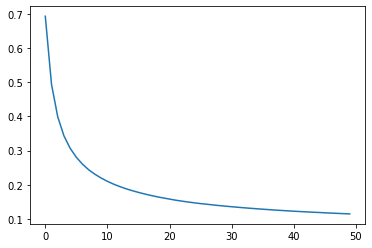

In [81]:
plt.plot(history)

Accuracy

In [82]:
predic7 = torch.round(torch.sigmoid(X_test.matmul(w)+b))
predic7 = [int (i) for i in predic7]
print("accuracy_score: {}".format(accuracy_score(predic7, y_test)))

accuracy_score: 0.9736842105263158


point estimator

In [83]:
# 속성 값을 통해 수식을 표현
print('y = sigma(' + str(float(b)) + ' ')
for i, c in enumerate(w):
  print(str(float(c)) + ' * x' + str(i)+')')

y = sigma(0.29694709181785583 
-0.35063838958740234 * x0)
-0.27152860164642334 * x1)
-0.34832265973091125 * x2)
-0.3424593210220337 * x3)
-0.16011492908000946 * x4)
-0.15343502163887024 * x5)
-0.269319087266922 * x6)
-0.3561632037162781 * x7)
-0.10343702137470245 * x8)
0.13469576835632324 * x9)
-0.3054691255092621 * x10)
-0.020189182832837105 * x11)
-0.26719143986701965 * x12)
-0.2771109938621521 * x13)
0.010596141219139099 * x14)
0.06912600249052048 * x15)
0.07344376295804977 * x16)
-0.06436864286661148 * x17)
0.0706324651837349 * x18)
0.161526158452034 * x19)
-0.4059692919254303 * x20)
-0.33755457401275635 * x21)
-0.39360570907592773 * x22)
-0.38088610768318176 * x23)
-0.27904123067855835 * x24)
-0.20148174464702606 * x25)
-0.25764670968055725 * x26)
-0.37553671002388 * x27)
-0.21954931318759918 * x28)
-0.09468530863523483 * x29)


d> Provide the point estimator using stochastic gradient descent using Pytorch functions similar to Section 4 of Pytorch_2_linear_regression.ipynb file

In [84]:
temp = nn.Linear(30,1)

In [85]:
print(temp.weight, temp.bias)

Parameter containing:
tensor([[ 0.1477,  0.1289,  0.0632,  0.0101, -0.0927, -0.1496,  0.0244,  0.1251,
         -0.0093, -0.1686,  0.1136, -0.1472,  0.0192,  0.0247,  0.1218, -0.1322,
          0.0546,  0.1630, -0.1061,  0.1311, -0.1487,  0.0626,  0.1782,  0.0075,
         -0.1096, -0.1408, -0.1032, -0.0031,  0.1730,  0.1311]],
       requires_grad=True) Parameter containing:
tensor([0.0456], requires_grad=True)


In [86]:
class logistic_regression(nn.Module):
    
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
        
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [87]:
model = logistic_regression(30)
optimizer = optim.SGD(model.parameters(), lr=0.01)

trainloader = DataLoader(dataset=mydata, batch_size=32, shuffle=True)

In [88]:
epochs = 20
history = []
for epoch in range(epochs):
  Yhat = model(mydata.x) #Yhat = w*X+b
  LOSS = criterion(Yhat, mydata.y) ###########
  history.append(LOSS)
  for x,y in trainloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

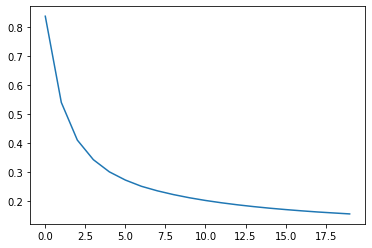

In [89]:
plt.plot(history)

Accuracy

In [90]:
predic8 = torch.round(model(X_test))
predic8 = [int (i) for i in predic8]
print("accuracy_score: {}".format(accuracy_score(predic8, y_test)))

accuracy_score: 0.956140350877193


point estimator

In [91]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.1048, -0.1664, -0.1999, -0.1122, -0.2779, -0.0162, -0.3730, -0.3170,
                       -0.2481,  0.1398, -0.1844,  0.0638, -0.1270, -0.2669,  0.0837,  0.0879,
                        0.0692,  0.0274, -0.0834,  0.0682, -0.2011, -0.3447, -0.4388, -0.3979,
                       -0.0554, -0.0897, -0.3046, -0.3175,  0.0197, -0.0857]])),
             ('linear.bias', tensor([0.2256]))])